## Figures for analysis of epithelial dataset
This notebook reproduces Figures 1A, S1F


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os
import pandas as pd
import re
import numpy as np
import glob
from pathlib import Path
from scipy import sparse
from copy import deepcopy
import pickle


<h3> Load data </h3>

In [25]:
out_dir = '/data/peer/chanj3/HTA.epithelial.010920/out.publication.010920/'

In [26]:
### Can be downloaded at https://data.humantumoratlas.org/
adata = sc.read(out_dir + 'adata.epithelial.010920.h5ad')

Only considering the two last: ['.010920', '.h5ad'].
Only considering the two last: ['.010920', '.h5ad'].


### Figure 1A

In [11]:
cluster_colors = np.array(['#00FFFF', '#222222', '#F3C300', '#875692', '#F38400', '#A1CAF1',
                '#BE0032', '#C2B280', '#848482', '#008856', '#E68FAC', '#0067A5', '#F99379', '#604E97', '#F6A600',
                '#B3446C', '#DCD300', '#882D17', '#8DB600', '#654522', '#E25822', '#2B3D26'])


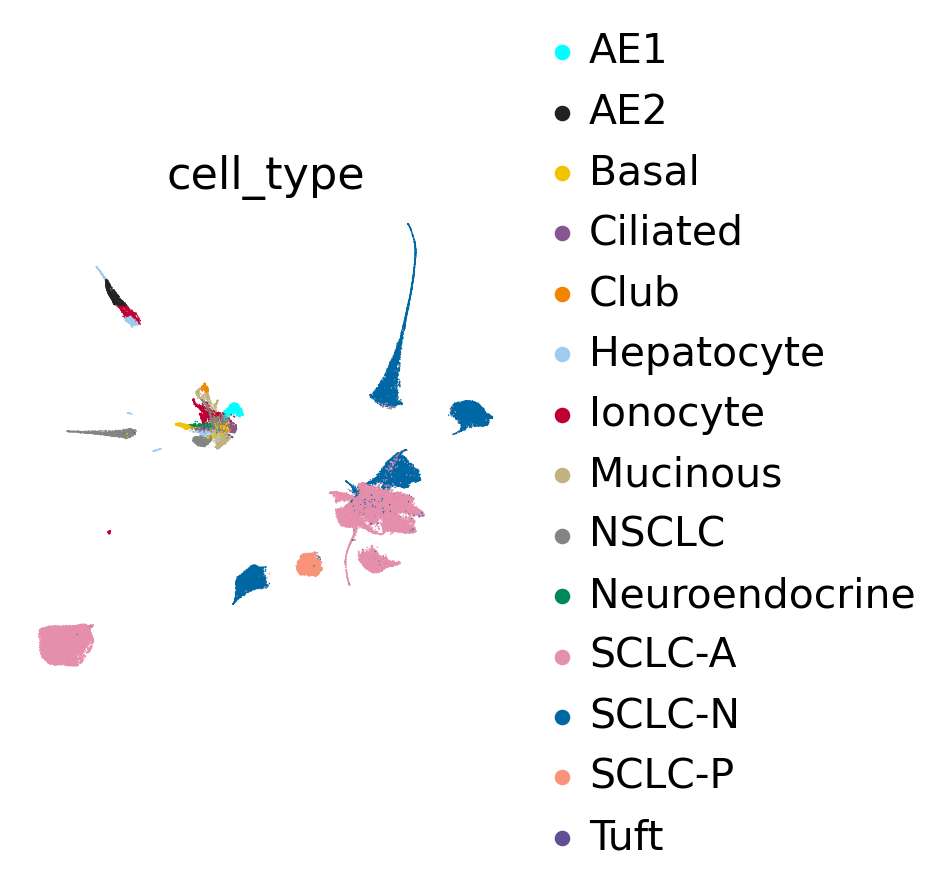

In [13]:
plt.rcParams['figure.figsize'] = (5,5)
sc.set_figure_params(fontsize=20)

sc.pl.umap(
    adata,
    color=['cell_type'],
    palette=list(cluster_colors),
    frameon=False, use_raw = False,
    sort_order=False, 
    ncols=1, 
)

### Figure S1F

In [28]:
cnv_bp_df = adata.uns['cnv_bp_df']

Text(0, 0.5, 'Count')

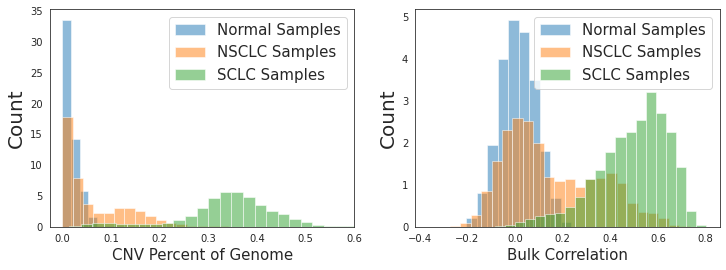

In [30]:
sns.set_style('white')
fig, axes = plt.subplots(1,2,figsize=(12,4))

ax=axes[0]
mode = 'CNV Percent of Genome'
ax.hist(cnv_bp_df['NSCLC'].loc[cnv_bp_df['NSCLC'].Normal,mode], bins=7, density=True, alpha=0.5, label='Normal Samples')
ax.hist(cnv_bp_df['NSCLC'].loc[~cnv_bp_df['NSCLC'].Normal,mode], bins=35, density=True, alpha=0.5, label='NSCLC Samples')
ax.hist(cnv_bp_df['SCLC'].loc[~cnv_bp_df['SCLC'].Normal,mode], bins=38, density=True, alpha=0.5, label='SCLC Samples')
ax.legend(loc='upper right', fontsize=15)
ax.set_xlabel('CNV Percent of Genome', fontsize = 15)
ax.set_ylabel('Count', fontsize = 20)

ax.set_xlim([-0.025,0.6])

ax=axes[1]
mode = 'Bulk Correlation'
ax.hist(cnv_bp_df['NSCLC'].loc[cnv_bp_df['NSCLC'].Normal,mode], bins=10, density=True, alpha=0.5, label='Normal Samples')
ax.hist(cnv_bp_df['NSCLC'].loc[~cnv_bp_df['NSCLC'].Normal,mode], bins=25, density=True, alpha=0.5, label='NSCLC Samples')
ax.hist(cnv_bp_df['SCLC'].loc[~cnv_bp_df['SCLC'].Normal,mode], bins=23, density=True, alpha=0.5, label='SCLC Samples')
ax.legend(loc='upper right', fontsize=15)
ax.set_xlabel('Bulk Correlation', fontsize = 15)
ax.set_ylabel('Count', fontsize = 20)
